<a href="https://colab.research.google.com/github/Gprieto88/Week6_anova_python/blob/main/Week6_anova_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [26]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

Download Packages

In [3]:
!pip install Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.2 MB/s eta 0:00:00


In [102]:
df = pd.read_csv('diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [103]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

# New Section

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from faker import Faker


In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

# metadata
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata)

# variable information
print(diabetes_130_us_hospitals_for_years_1999_2008.variables)


{'uci_id': 296, 'name': 'Diabetes 130-US hospitals for years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [12]:
dataframe1 = pd.DataFrame(X)
dataframe1

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


#Normality

In [29]:
# fake = Faker()

In [30]:
#seed = 42
# np.random.seed(seed)
# Faker.seed(seed)

In [81]:
# # Number of samples
# n = 90

In [104]:
# Create data frame
df = pd.DataFrame({
    'ID': [fake.uuid4() for _ in range(n)],
    'Blood Glucose': np.concatenate([
        np.random.normal(150, 20, int(n/4)),  # Diabetic & Overweight
        np.random.normal(130, 15, int(n/4)),  # Diabetic & Not Overweight
        np.random.normal(100, 10, int(n/4)),  # Non-diabetic & Overweight
        np.random.normal(90, 7, int(n/4))     # Non-diabetic & Not Overweight
    ]),
    'Diabetic Status': np.concatenate([
        ['Diabetic'] * int(n/2),
        ['Non-diabetic'] * int(n/2)
    ]),
    'Weight Status': np.concatenate([
        ['Overweight', 'Not Overweight'] * int(n/2)

    ])
})


NameError: ignored

In [13]:
dataframe2 = pd.DataFrame(y)
dataframe2

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO
...,...
101761,>30
101762,NO
101763,NO
101764,NO


In [14]:
df = pd.merge(dataframe1, dataframe2, left_index=True, right_index=True)
df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [20]:
Diabetes = df[['gender','age','time_in_hospital']]
Diabetes

,gender,age,time_in_hospital
0,Female,[0-10),1
1,Female,[10-20),3
2,Female,[20-30),2
3,Male,[30-40),2
4,Male,[40-50),1
...,...,...,...
101761,Male,[70-80),3
101762,Female,[80-90),5
101763,Male,[70-80),1
101764,Female,[80-90),10


In [96]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [23]:
groups = Diabetes.groupby(['gender', 'age'])
groups

In [105]:
for (gender, age), group_Diabetes in groups:
  _, p_value = stats.shapiro(group_Diabetes['time_in_hospital'])
  print(f"Group ({gender}, {age}):")
  print(f"P=value from Shapiro-Wilk Test: {p_value}\n")



KeyError: ignored

Levene Test

In [28]:
df = pd.DataFrame()

In [106]:
# Levene's Test
stats.levene(
    df['time_in_hospital'][df['gender'] == 'Female'][df['age'] == '0-10'],
    df['time_in_hospital'][df['gender'] == 'Female'][df['age'] == '10-20'],
    df['time_in_hospital'][df['gender'] == 'Female'][df['age'] == '20-30'],
    df['time_in_hospital'][df['gender'] == 'Female'][df['age'] == '30-40'],
    df['time_in_hospital'][df['gender'] == 'Male'][df['age'] == '0-10'],
    df['time_in_hospital'][df['gender'] == 'Male'][df['age'] == '10-20'],
    df['time_in_hospital'][df['gender'] == 'Male'][df['age'] == '20-30'],
    df['time_in_hospital'][df['gender'] == 'Male'][df['age'] == '30-40'],
    df['time_in_hospital'][df['gender'] == 'Female'][df['age'] == '90-100'],
    df['time_in_hospital'][df['gender'] == 'Male'][df['age'] == '90-100'],
)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


LeveneResult(statistic=nan, pvalue=nan)

# Anova

# Variables of Interest

dv = time_in_hospital iv1 = gender iv2 = age

In [107]:
# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [108]:
Diabetes1 = pd.DataFrame(X)
Diabetes1

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [109]:
df.to_csv('diabetes.csv')

In [110]:
print('Main DV: ', stats.shapiro(df['time_in_hospital']))


Main DV:  ShapiroResult(statistic=0.8869192600250244, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


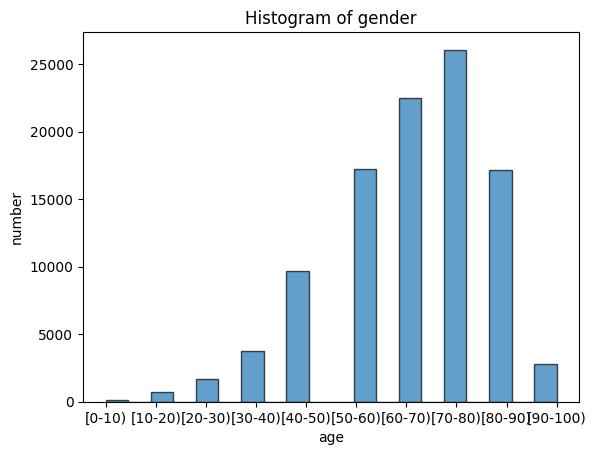

In [111]:
plt.hist(df['age'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of gender')
plt.xlabel('age')
plt.ylabel('number')
plt.show()

In [113]:
groups = df.groupby(['gender', 'age'])

for (gender_status, age_status), group_df in groups:
    _, p_value = stats.shapiro(group_df['time_in_hospital'])

    print(f"Group ({gender_status}, {age_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")

Group (Female, [0-10)):
P-value from Shapiro-Wilk Test: 2.0656632386817364e-06

Group (Female, [10-20)):
P-value from Shapiro-Wilk Test: 5.4530704270999036e-24

Group (Female, [20-30)):
P-value from Shapiro-Wilk Test: 1.4458526332171403e-33

Group (Female, [30-40)):
P-value from Shapiro-Wilk Test: 8.284476521088319e-42

Group (Female, [40-50)):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, [50-60)):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, [60-70)):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, [70-80)):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, [80-90)):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, [90-100)):
P-value from Shapiro-Wilk Test: 5.019741076965262e-33

Group (Male, [0-10)):
P-value from Shapiro-Wilk Test: 1.1457602511200093e-07

Group (Male, [10-20)):
P-value from Shapiro-Wilk Test: 5.368671776572118e-22

Group (Male, [20-30)):
P-value from Shapiro-Wilk Test: 6.224277414122974e-24

Group (Male, [30-40)):
P-value from Shapiro-Wilk Test

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ValueError: ignored

In [116]:
df['age'] = df['age'].astype(str)
df['gender'] = df['gender'].astype(str)

In [117]:
# Levene's Test
stats.levene(
    df['time_in_hospital'][df['gender'] == 'Female'][df['age'] == '0-10'],
    df['time_in_hospital'][df['gender'] == 'Female'][df['age'] == '10-20'],
    df['time_in_hospital'][df['gender'] == 'Female'][df['age'] == '20-30'],
    df['time_in_hospital'][df['gender'] == 'Female'][df['age'] == '30-40'],
    df['time_in_hospital'][df['gender'] == 'Male'][df['age'] == '0-10'],
    df['time_in_hospital'][df['gender'] == 'Male'][df['age'] == '10-20'],
    df['time_in_hospital'][df['gender'] == 'Male'][df['age'] == '20-30'],
    df['time_in_hospital'][df['gender'] == 'Male'][df['age'] == '30-40'],
    df['time_in_hospital'][df['gender'] == 'Female'][df['age'] == '90-100'],
    df['time_in_hospital'][df['gender'] == 'Male'][df['age'] == '90-100'],
)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


LeveneResult(statistic=nan, pvalue=nan)

In [120]:
model = ols('time_in_hospital ~ C(gender) * C(age)', data=df).fit()

In [121]:

# Performing the two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                        sum_sq        df             F         PR(>F)
C(gender)        -4.042776e-08       2.0 -2.297277e-09   1.000000e+00
C(age)            1.654694e+04       9.0  2.089484e+02  7.407718e-179
C(gender):C(age)  2.903281e+02      18.0  1.833076e+00   4.315834e-02
Residual          8.952514e+05  101744.0           NaN            NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 11
  warnings.warn('covariance of constraints does not have full '
